In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# Load the data
df = pd.read_csv('data\Superstore.csv , encoding='ISO-8859-1')

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\razak\AppData\Local\Temp\ipykernel_23740\3227986421.py:2: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('data\Superstore.csv' , encoding='ISO-8859-1')


FileNotFoundError: [Errno 2] No such file or directory: 'data\\Superstore.csv'

In [ ]:
# Preview first few rows
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [ ]:
# Basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:

# Missing values
print(df.isnull().sum())


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [ ]:
# Drop unnecessary columns
df.drop(['Row ID', 'Country', 'Postal Code', 'Product ID', 'Customer ID'], axis=1, inplace=True)


In [ ]:
# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Extract new columns
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Weekday'] = df['Order Date'].dt.day_name()


In [ ]:
df.head(4)

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order Year,Order Weekday
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,Tuesday
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,Tuesday
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,Sunday
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,Sunday


EDA Phase 1 Begins from basic to advance

In [ ]:
# Overall metrics
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
total_orders = df['Order ID'].nunique()

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Total Unique Orders: {total_orders}")


Total Sales: $2,297,200.86
Total Profit: $286,397.02
Total Unique Orders: 5009


C:\Users\razak\AppData\Local\Temp\ipykernel_17620\1041363016.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_year, x='Order Year', y='Sales', palette='viridis')


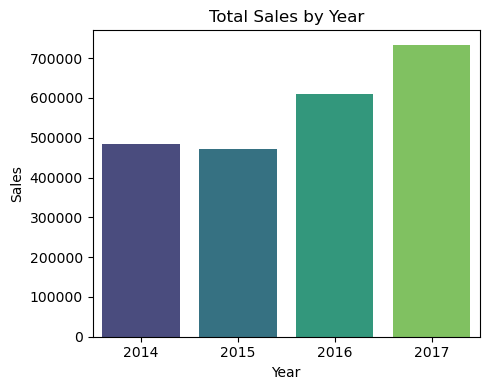

In [ ]:
sales_by_year = df.groupby('Order Year')['Sales'].sum().reset_index()

plt.figure(figsize=(5,4))
sns.barplot(data=sales_by_year, x='Order Year', y='Sales', palette='viridis')
plt.title('Total Sales by Year')
plt.ylabel('Sales')
plt.xlabel('Year')
plt.tight_layout()
plt.show()


 EDA Phase 2: Deep-Dive Analysis

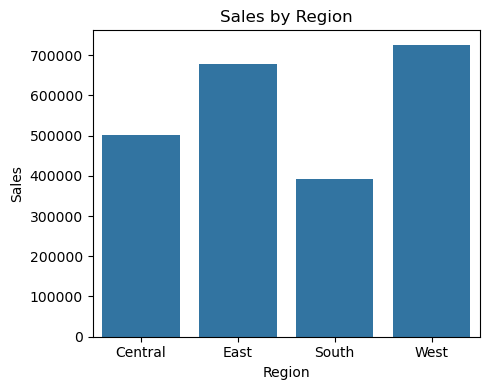

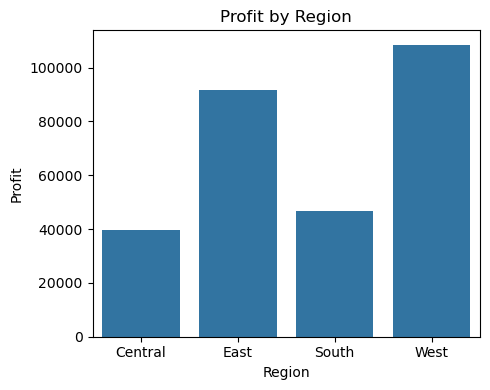

In [ ]:
region_summary = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(5,4))
sns.barplot(data=region_summary, x='Region', y='Sales')
plt.title('Sales by Region')
plt.ylabel('Sales')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,4))
sns.barplot(data=region_summary, x='Region', y='Profit')
plt.title('Profit by Region')
plt.ylabel('Profit')
plt.xlabel('Region')
plt.tight_layout()
plt.show()


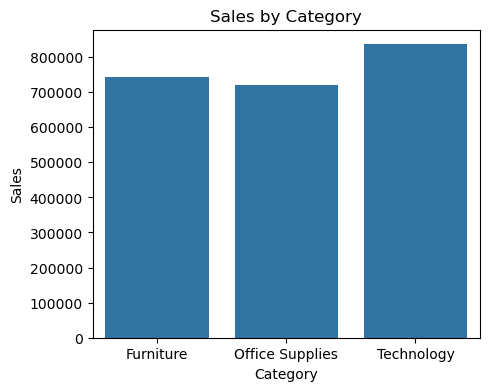

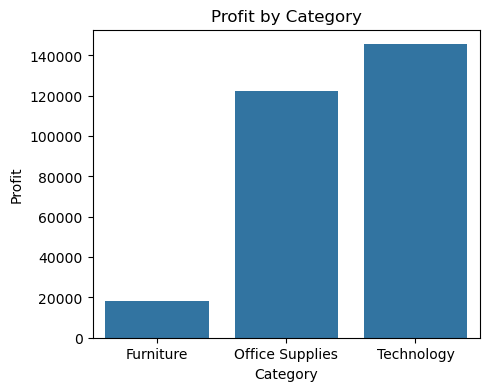

In [ ]:
# By Category
cat_summary = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(5,4))
sns.barplot(data=cat_summary, x='Category', y='Sales')
plt.title('Sales by Category')
plt.show()

plt.figure(figsize=(5,4))
sns.barplot(data=cat_summary, x='Category', y='Profit')
plt.title('Profit by Category')
plt.show()


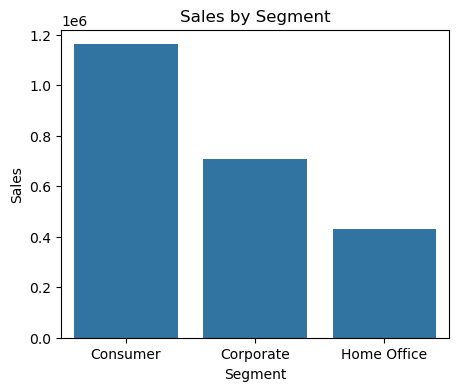

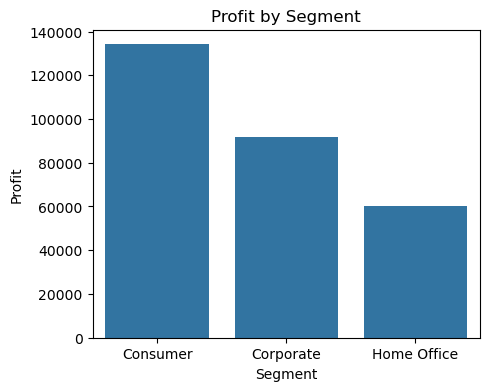

In [ ]:
segment_summary = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(5,4))
sns.barplot(data=segment_summary, x='Segment', y='Sales')
plt.title('Sales by Segment')
plt.show()

plt.figure(figsize=(5,4))
sns.barplot(data=segment_summary, x='Segment', y='Profit')
plt.title('Profit by Segment')
plt.show()


📆 Monthly Sales Trend (Line Chart)

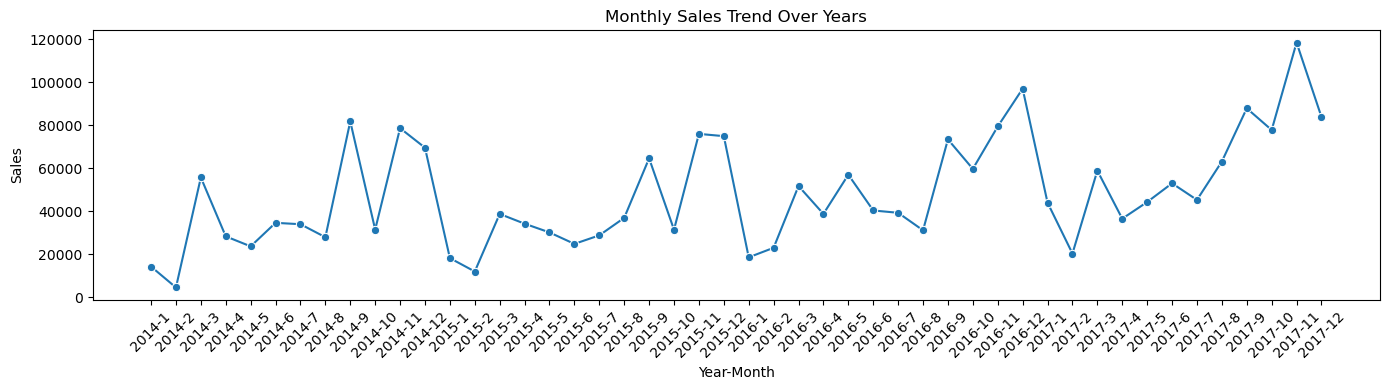

In [ ]:
monthly_sales = df.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()

# Combine year and month into one label
monthly_sales['Year-Month'] = monthly_sales['Order Year'].astype(str) + '-' + monthly_sales['Order Month'].astype(str)

plt.figure(figsize=(14,4))
sns.lineplot(data=monthly_sales, x='Year-Month', y='Sales', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend Over Years')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


📅 Weekday-wise Sales Performance

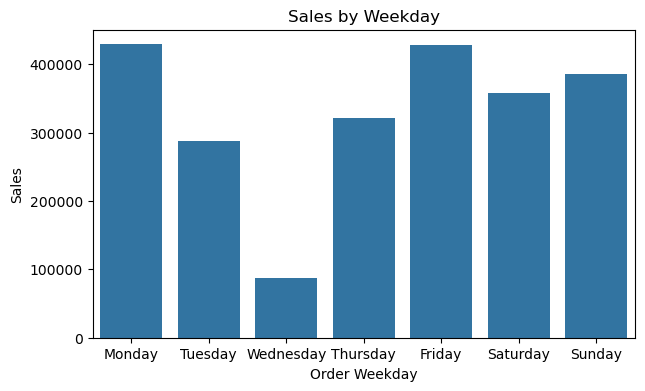

In [ ]:
weekday_sales = df.groupby('Order Weekday')['Sales'].sum().reset_index()

# Optional: sort days in correct order
from pandas.api.types import CategoricalDtype
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=weekday_order, ordered=True)
weekday_sales['Order Weekday'] = weekday_sales['Order Weekday'].astype(cat_type)
weekday_sales = weekday_sales.sort_values('Order Weekday')

plt.figure(figsize=(7,4))
sns.barplot(data=weekday_sales, x='Order Weekday', y='Sales')
plt.title('Sales by Weekday')
plt.show()


🚚 Ship Mode Analysis

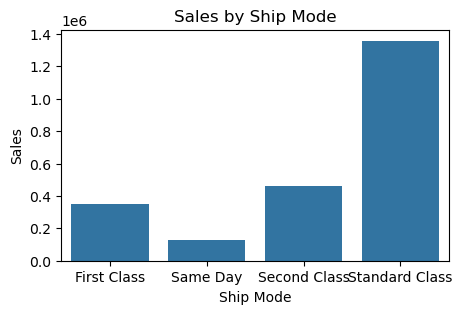

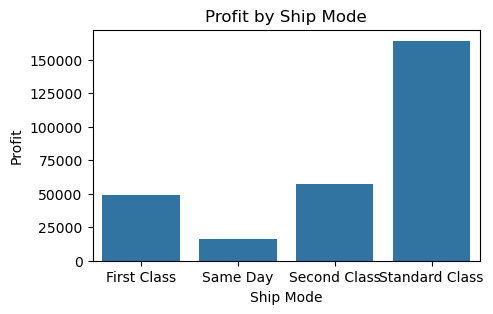

In [ ]:
shipmode_summary = df.groupby('Ship Mode')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(5,3))
sns.barplot(data=shipmode_summary, x='Ship Mode', y='Sales')
plt.title('Sales by Ship Mode')
plt.show()

plt.figure(figsize=(5,3))
sns.barplot(data=shipmode_summary, x='Ship Mode', y='Profit')
plt.title('Profit by Ship Mode')
plt.show()


Select features for clustering

In [ ]:
features = df[['Sales', 'Profit', 'Discount', 'Quantity']]

# Scale the data (very important for clustering)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Show sample of scaled data
pd.DataFrame(scaled_features, columns=features.columns).head()


,Sales,Profit,Discount,Quantity
0,0.051510,0.056593,-0.756643,-0.804303
1,0.805633,0.815054,-0.756643,-0.354865
2,-0.345368,-0.093002,-0.756643,-0.804303
3,1.167688,-1.757484,1.423149,0.544012
4,-0.332935,-0.111593,0.212153,-0.804303


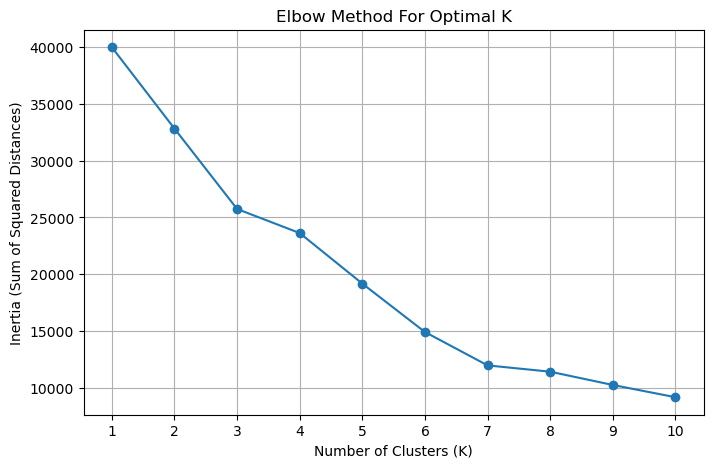

In [ ]:
# Inertia plot for Elbow Method
inertia = []
K = range(1, 11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_features)
    inertia.append(model.inertia_)

# Plot the elbow
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(K)
plt.grid(True)
plt.show()


 Apply KMeans (with K = 4)

In [ ]:
# Train KMeans model with K=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to original DataFrame
df['Cluster'] = kmeans.labels_

# Show few rows
df[['Sales', 'Profit', 'Discount', 'Quantity', 'Cluster']].head()


,Sales,Profit,Discount,Quantity,Cluster
0,261.9600,41.9136,0.00,2,0
1,731.9400,219.5820,0.00,3,0
2,14.6200,6.8714,0.00,2,0
3,957.5775,-383.0310,0.45,5,2
4,22.3680,2.5164,0.20,2,0


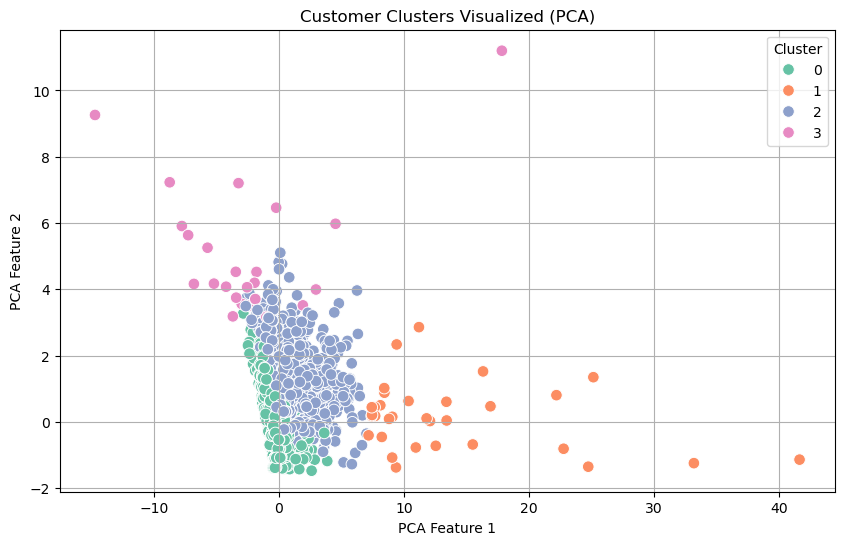

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Add to dataframe
df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]

# Plot the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=70)
plt.title('Customer Clusters Visualized (PCA)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Facebook Prophet

In [8]:
# Monthly sales data
monthly_sales = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales'].sum().reset_index()

# Rename columns for Prophet
monthly_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)

monthly_sales.head()


NameError: name 'df' is not defined

In [ ]:
from prophet import Prophet

# Step 1: Model banana
model = Prophet()

# Step 2: Fit (training) on monthly sales data
model.fit(monthly_sales)  # jo tumne abhi bnayi ds-y wali

# Step 3: Future months create karna (e.g. 6 months ahead)
future = model.make_future_dataframe(periods=6, freq='ME')

# Step 4: Predict future sales
forecast = model.predict(future)

# Step 5: Show prediction values
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()




NameError: name 'monthly_sales' is not defined

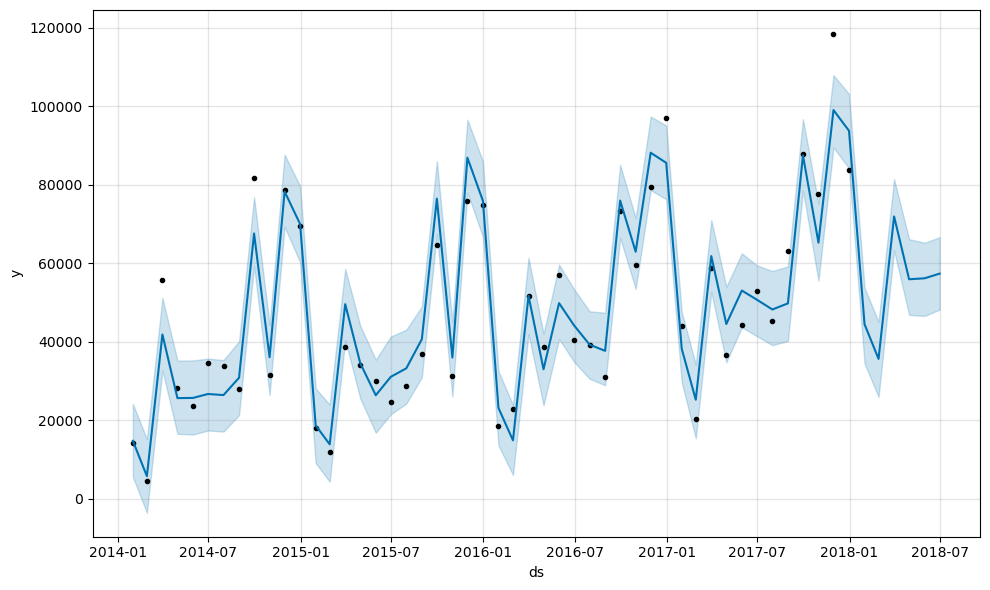

In [ ]:
model.plot(forecast);


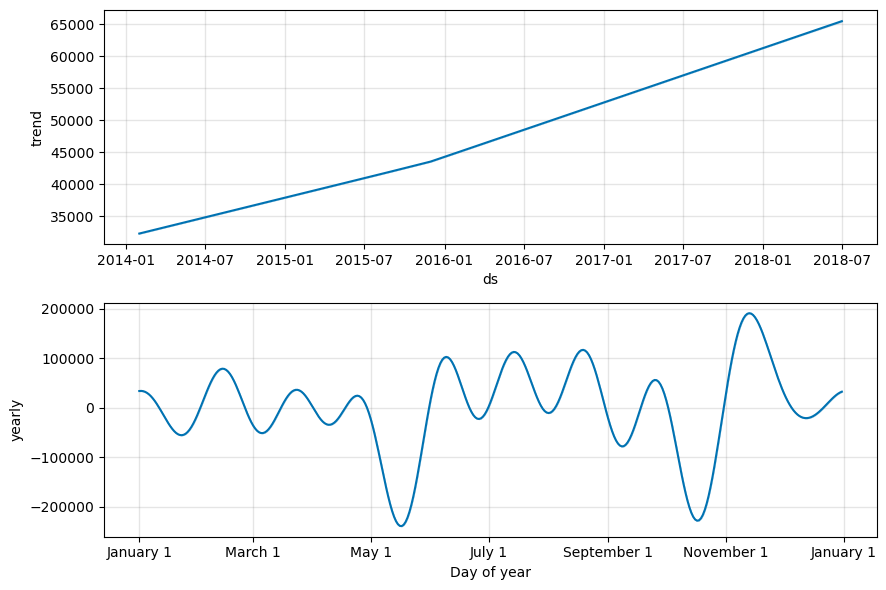

In [ ]:
model.plot_components(forecast);


In [ ]:
forecast.to_csv("data/forecast_sales.csv", index=False)


NameError: name 'forecast' is not defined